In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

from sklearn.linear_model import LinearRegression, LogisticRegression

from scipy.stats import chi2_contingency

from tqdm import tqdm
import warnings
from pprint import pprint

In [2]:
data = pd.read_csv("./data/augmented_data.csv")

In [3]:
# drop redundant features
data.drop(["location_x", "location_y"], axis=1, inplace=True)
# drop features that leak target information
# data.drop(["shot_angle", "duration"], axis=1, inplace=True)
# drop low information features
# data.drop(["aerial_won", "follows_dribble", "possession", "minute", "period", "num_passes", "pass_duration", "pass_height", "pass_type", "type"], axis=1, inplace=True)
# "position", "body_part", "type", "pass_height", "pass_type"

In [4]:
data.nunique()

period                     5
minute                   139
possession               290
duration               78058
play_pattern               9
position                  25
location_x_distance      635
location_y_distance      472
technique                  7
body_part                  4
type                       5
is_penalty                 2
first_time                 2
open_goal                  2
one_on_one                 2
aerial_won                 2
follows_dribble            2
under_pressure             2
pass_duration          11912
pass_angle             10519
pass_type                  8
pass_height                4
pass_length             9930
num_passes                13
defenders_3m_radius       10
defenders_triangle        13
goalkeeper_x             258
goalkeeper_y             355
distance_to_goalie     45564
statsbomb_xg           82551
end_location_x           376
end_location_y           705
is_goal                    2
shot_angle             52936
good_foot     

In [5]:
data = data.dropna()
data.replace([np.inf, -np.inf], 0, inplace=True)

In [6]:
y1 = data["statsbomb_xg"]
y2 = data["is_goal"]
X = data.drop(["statsbomb_xg", "is_goal", "end_location_x", "end_location_y"], axis=1)

In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84065 entries, 0 to 84064
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   period               84065 non-null  float64
 1   minute               84065 non-null  float64
 2   possession           84065 non-null  float64
 3   duration             84065 non-null  float64
 4   play_pattern         84065 non-null  object 
 5   position             84065 non-null  object 
 6   location_x_distance  84065 non-null  float64
 7   location_y_distance  84065 non-null  float64
 8   technique            84065 non-null  object 
 9   body_part            84065 non-null  object 
 10  type                 84065 non-null  object 
 11  is_penalty           84065 non-null  bool   
 12  first_time           84065 non-null  bool   
 13  open_goal            84065 non-null  bool   
 14  one_on_one           84065 non-null  bool   
 15  aerial_won           84065 non-null 

In [8]:
chi = []
for column in ["is_penalty", "first_time", "open_goal", "one_on_one", "under_pressure", "defenders_3m_radius", "defenders_triangle", "good_foot", "play_pattern", "technique", "position", "body_part"]:
    contingency_table = pd.crosstab(X[column], y2)
    chi2, p, dof, _ = chi2_contingency(contingency_table)
    chi.append((column, chi2, p, dof))

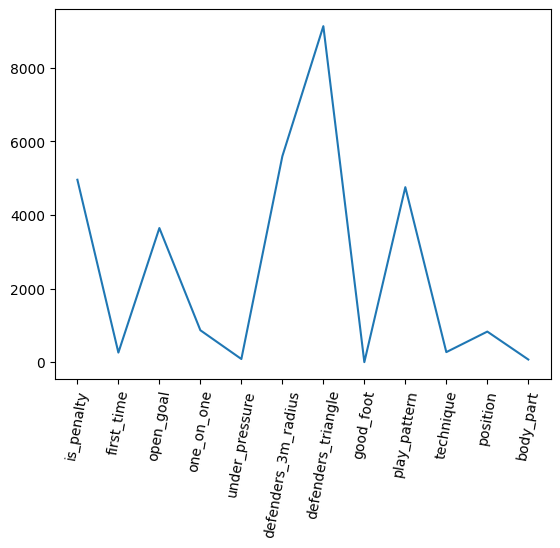

In [9]:
ax = pd.Series([x[1] for x in chi]).plot(xticks=pd.Series([x[0] for x in chi]).index, rot=80)
_ = ax.set_xticklabels(pd.Series([x[0] for x in chi]))

In [10]:
contingency_table = pd.crosstab(X['defenders_triangle'], y2)
chi2, p, dof, _ = chi2_contingency(contingency_table)

# Output results
print("Chi-squared statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)

Chi-squared statistic: 9132.968568598497
P-value: 0.0
Degrees of freedom: 12


In [11]:
contingency_table = pd.crosstab(X['body_part'], X['good_foot'])
chi2, p, dof, _ = chi2_contingency(contingency_table)

# Output results
print("Chi-squared statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)

Chi-squared statistic: 13059.52251919658
P-value: 0.0
Degrees of freedom: 3


In [18]:
model = LogisticRegression()
model.fit(pd.DataFrame(X['good_foot']), y1)

# Print coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.